# JFK flights

## Import de las librerias

In [1]:
import numpy as np  
import pandas as pd 

#visualizacion de datos

import matplotlib.pyplot as plt 
import seaborn as sns 

#import graphviz

plt.style.use('ggplot')
pd.set_option('display.max_rows',100)

In [2]:
from sklearn import preprocessing

## Import de los datos

In [3]:
url1 = 'https://bit.ly/3bf6QNP'
url2 = 'https://bit.ly/3kLR2p3'

In [4]:
df1 = pd.read_csv(url1)

In [5]:
df1.head()

,Unnamed: 0,FL_DATE,OP_CARRIER_AIRLINE_ID,TAIL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST,DEST_CITY_NAME,DEST_STATE_NM,CRS_DEP_TIME,TAXI_OUT,CRS_ARR_TIME,ARR_DEL15,CRS_ELAPSED_TIME,DISTANCE
0,0,2018-02-01,20363.0,N299PQ,BNA,"Nashville, TN",Tennessee,JFK,"New York, NY",New York,1359,27.0,1719,0.0,140.0,765.0
1,1,2018-02-01,20363.0,N920XJ,RDU,"Raleigh/Durham, NC",North Carolina,JFK,"New York, NY",New York,1354,37.0,1541,0.0,107.0,427.0
2,2,2018-02-01,20363.0,N605LR,BUF,"Buffalo, NY",New York,JFK,"New York, NY",New York,1529,21.0,1709,0.0,100.0,301.0
3,3,2018-02-01,20363.0,N800AY,ORF,"Norfolk, VA",Virginia,JFK,"New York, NY",New York,1704,36.0,1845,0.0,101.0,290.0
4,4,2018-02-01,20363.0,N600LR,BOS,"Boston, MA",Massachusetts,JFK,"New York, NY",New York,1325,20.0,1454,0.0,89.0,187.0


In [6]:
df2 = pd.read_csv(url2)

In [7]:
df2.head()

,Unnamed: 0,FL_DATE,OP_CARRIER_AIRLINE_ID,TAIL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST,DEST_CITY_NAME,DEST_STATE_NM,CRS_DEP_TIME,TAXI_OUT,CRS_ARR_TIME,ARR_DEL15,CRS_ELAPSED_TIME,DISTANCE
0,100000,2019-08-23,20363.0,N605LR,IND,"Indianapolis, IN",Indiana,JFK,"New York, NY",New York,1922,13.0,2145,0.0,143.0,665.0
1,100001,2019-08-23,20363.0,N604LR,BNA,"Nashville, TN",Tennessee,JFK,"New York, NY",New York,1031,NaN,1415,0.0,164.0,765.0
2,100002,2019-08-23,20363.0,N601LR,PIT,"Pittsburgh, PA",Pennsylvania,JFK,"New York, NY",New York,1718,18.0,1854,0.0,96.0,340.0
3,100003,2019-08-23,19805.0,N857NN,PHX,"Phoenix, AZ",Arizona,JFK,"New York, NY",New York,1218,22.0,2029,0.0,311.0,2153.0
4,100004,2019-08-23,20398.0,N852AE,PIT,"Pittsburgh, PA",Pennsylvania,JFK,"New York, NY",New York,1401,11.0,1544,0.0,103.0,340.0


In [8]:
df = df1.append(df2)

In [9]:
df.head()

,Unnamed: 0,FL_DATE,OP_CARRIER_AIRLINE_ID,TAIL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST,DEST_CITY_NAME,DEST_STATE_NM,CRS_DEP_TIME,TAXI_OUT,CRS_ARR_TIME,ARR_DEL15,CRS_ELAPSED_TIME,DISTANCE
0,0,2018-02-01,20363.0,N299PQ,BNA,"Nashville, TN",Tennessee,JFK,"New York, NY",New York,1359,27.0,1719,0.0,140.0,765.0
1,1,2018-02-01,20363.0,N920XJ,RDU,"Raleigh/Durham, NC",North Carolina,JFK,"New York, NY",New York,1354,37.0,1541,0.0,107.0,427.0
2,2,2018-02-01,20363.0,N605LR,BUF,"Buffalo, NY",New York,JFK,"New York, NY",New York,1529,21.0,1709,0.0,100.0,301.0
3,3,2018-02-01,20363.0,N800AY,ORF,"Norfolk, VA",Virginia,JFK,"New York, NY",New York,1704,36.0,1845,0.0,101.0,290.0
4,4,2018-02-01,20363.0,N600LR,BOS,"Boston, MA",Massachusetts,JFK,"New York, NY",New York,1325,20.0,1454,0.0,89.0,187.0


In [10]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

## Machine Learning Checklist - Analisis Univariante 2.1

### Tamaño del dataset

In [11]:
df.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250152 entries, 0 to 150151
Columns: 15 entries, FL_DATE to DISTANCE
dtypes: float64(5), int64(2), object(8)
memory usage: 30.5+ MB


In [12]:
#reset index
df.reset_index(drop=True, inplace=True)

### Visualizacion directa

In [13]:
df.columns

Index(['FL_DATE', 'OP_CARRIER_AIRLINE_ID', 'TAIL_NUM', 'ORIGIN',
       'ORIGIN_CITY_NAME', 'ORIGIN_STATE_NM', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_NM', 'CRS_DEP_TIME', 'TAXI_OUT', 'CRS_ARR_TIME',
       'ARR_DEL15', 'CRS_ELAPSED_TIME', 'DISTANCE'],
      dtype='object')

In [14]:
df.head(1)

,FL_DATE,OP_CARRIER_AIRLINE_ID,TAIL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST,DEST_CITY_NAME,DEST_STATE_NM,CRS_DEP_TIME,TAXI_OUT,CRS_ARR_TIME,ARR_DEL15,CRS_ELAPSED_TIME,DISTANCE
0,2018-02-01,20363.0,N299PQ,BNA,"Nashville, TN",Tennessee,JFK,"New York, NY",New York,1359,27.0,1719,0.0,140.0,765.0


### Tipos de atributos

In [15]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250152 entries, 0 to 250151
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   FL_DATE                250152 non-null  object 
 1   OP_CARRIER_AIRLINE_ID  237644 non-null  float64
 2   TAIL_NUM               235143 non-null  object 
 3   ORIGIN                 250152 non-null  object 
 4   ORIGIN_CITY_NAME       250152 non-null  object 
 5   ORIGIN_STATE_NM        250152 non-null  object 
 6   DEST                   250152 non-null  object 
 7   DEST_CITY_NAME         250152 non-null  object 
 8   DEST_STATE_NM          250152 non-null  object 
 9   CRS_DEP_TIME           250152 non-null  int64  
 10  TAXI_OUT               232641 non-null  float64
 11  CRS_ARR_TIME           250152 non-null  int64  
 12  ARR_DEL15              250152 non-null  float64
 13  CRS_ELAPSED_TIME       250152 non-null  float64
 14  DISTANCE               250152 non-nu

In [16]:
TARGET = 'ARR_DEL15'

### Estadísticos descriptivos

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
OP_CARRIER_AIRLINE_ID,237644.0,20152.000736,297.881929,19690.0,19790.0,20363.0,20409.0,21171.0
CRS_DEP_TIME,250152.0,1334.611164,529.100385,3.0,915.0,1258.0,1744.0,2359.0
TAXI_OUT,232641.0,18.189820,9.609596,1.0,12.0,16.0,21.0,166.0
CRS_ARR_TIME,250152.0,1419.131404,580.986009,1.0,944.0,1455.0,1914.0,2400.0
ARR_DEL15,250152.0,0.210400,0.407594,0.0,0.0,0.0,0.0,1.0
CRS_ELAPSED_TIME,250152.0,195.647706,97.374339,47.0,109.0,167.0,306.0,595.0
DISTANCE,250152.0,1258.844866,898.116163,94.0,427.0,1028.0,2248.0,4983.0


In [18]:
df.describe(exclude = np.number).T

,count,unique,top,freq
FL_DATE,250152,730,2018-08-10,394
TAIL_NUM,235143,2645,N110AN,761
ORIGIN,250152,72,LAX,25345
ORIGIN_CITY_NAME,250152,70,"Los Angeles, CA",25345
ORIGIN_STATE_NM,250152,32,California,51137
DEST,250152,1,JFK,250152
DEST_CITY_NAME,250152,1,"New York, NY",250152
DEST_STATE_NM,250152,1,New York,250152


### Valores nulos

In [19]:
df.select_dtypes(include = np.number).isnull().sum()

OP_CARRIER_AIRLINE_ID    12508
CRS_DEP_TIME                 0
TAXI_OUT                 17511
CRS_ARR_TIME                 0
ARR_DEL15                    0
CRS_ELAPSED_TIME             0
DISTANCE                     0
dtype: int64

In [20]:
df.select_dtypes(exclude = np.number).isnull().sum()

FL_DATE                 0
TAIL_NUM            15009
ORIGIN                  0
ORIGIN_CITY_NAME        0
ORIGIN_STATE_NM         0
DEST                    0
DEST_CITY_NAME          0
DEST_STATE_NM           0
dtype: int64

### Variable target - distribución

In [21]:
df[TARGET].value_counts()

0.0    197520
1.0     52632
Name: ARR_DEL15, dtype: int64

In [22]:
df[TARGET].mean()

0.21040007675333397

### ML 2.1.7 - 11: EDA

#### Analisis de fechas

In [23]:
df_LAX = df[df['ORIGIN'] == 'LAX']

In [24]:
df_LAX.head()

,FL_DATE,OP_CARRIER_AIRLINE_ID,TAIL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST,DEST_CITY_NAME,DEST_STATE_NM,CRS_DEP_TIME,TAXI_OUT,CRS_ARR_TIME,ARR_DEL15,CRS_ELAPSED_TIME,DISTANCE
34,2018-02-01,19805.0,N104NN,LAX,"Los Angeles, CA",California,JFK,"New York, NY",New York,1530,40.0,2359,1.0,329.0,2475.0
35,2018-02-01,19805.0,N117AN,LAX,"Los Angeles, CA",California,JFK,"New York, NY",New York,1045,24.0,1919,0.0,334.0,2475.0
36,2018-02-01,19805.0,N111ZM,LAX,"Los Angeles, CA",California,JFK,"New York, NY",New York,1630,36.0,59,0.0,329.0,2475.0
39,2018-02-01,19805.0,N101NN,LAX,"Los Angeles, CA",California,JFK,"New York, NY",New York,1245,17.0,2123,0.0,338.0,2475.0
100,2018-02-01,19790.0,NaN,LAX,"Los Angeles, CA",California,JFK,"New York, NY",New York,1130,27.0,2000,0.0,330.0,2475.0


In [25]:
#FORMATO SQL
select
    FL_DATE,
    AVG(TARGET)
    FROM DF_LAX
    GROUP BY FL_DATE

IndentationError: unexpected indent (<ipython-input-25-891591678ca5>, line 3)

In [26]:
df_LAX_dia = df_LAX[['FL_DATE',TARGET]].groupby(['FL_DATE']).mean()

In [27]:
df_LAX_dia.head()

,ARR_DEL15
FL_DATE,
2018-01-01,0.322581
2018-01-02,0.371429
2018-01-03,0.107143
2018-01-04,0.500000
2018-01-05,0.724138


In [28]:
df_LAX_dia.index = pd.to_datetime(df_LAX_dia.index)

In [29]:
df_LAX_dia.head()

,ARR_DEL15
FL_DATE,
2018-01-01,0.322581
2018-01-02,0.371429
2018-01-03,0.107143
2018-01-04,0.500000
2018-01-05,0.724138


<AxesSubplot:xlabel='FL_DATE'>

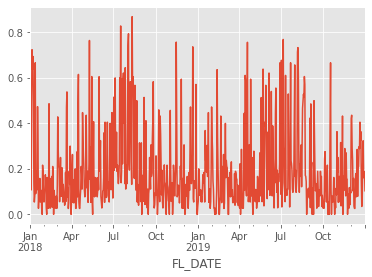

In [30]:
df_LAX_dia[TARGET].plot()

<AxesSubplot:xlabel='FL_DATE'>

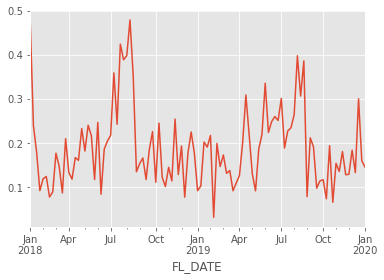

In [31]:
df_LAX_dia[TARGET].resample('W').mean().plot()

Inicio clase 2

## Analisis de variables numéricas

<AxesSubplot:ylabel='Frequency'>

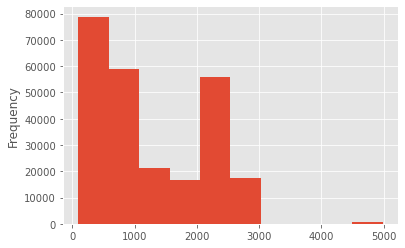

In [32]:
df['DISTANCE'].plot(kind = 'hist')

<AxesSubplot:xlabel='ARR_DEL15', ylabel='DISTANCE'>

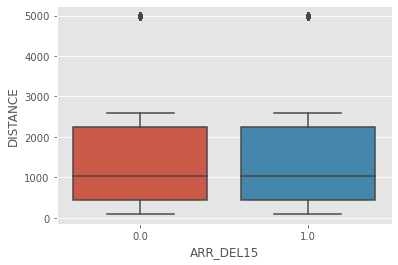

In [33]:
sns.boxplot(data = df, x= TARGET, y= 'DISTANCE')

<AxesSubplot:xlabel='ARR_DEL15', ylabel='CRS_DEP_TIME'>

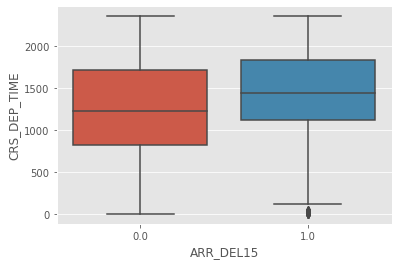

In [34]:
sns.boxplot(data = df, x= TARGET, y= 'CRS_DEP_TIME')

### Analisis categoria

In [35]:
df.pivot_table(index='ORIGIN_STATE_NM', values = TARGET, aggfunc = [len,sum,np.mean]).sort_values(by=[('mean','ARR_DEL15')], ascending = False)

,len,sum,mean
,ARR_DEL15,ARR_DEL15,ARR_DEL15
ORIGIN_STATE_NM,,,
Illinois,5647.0,1705.0,0.301930
Hawaii,754.0,222.0,0.294430
New Mexico,602.0,148.0,0.245847
Wyoming,29.0,7.0,0.241379
Florida,40488.0,9747.0,0.240738
North Carolina,14434.0,3410.0,0.236248
Georgia,9534.0,2059.0,0.215964
Texas,9322.0,2012.0,0.215834


## Data preparation

### Ajuste de tipos

In [36]:
df['AEROLINEA'] = df['OP_CARRIER_AIRLINE_ID'].astype(object)

In [37]:
df.drop('OP_CARRIER_AIRLINE_ID', axis =1, inplace= True)

## Nulos en numéricas

In [38]:
df.select_dtypes(include = np.number).isnull().sum()

CRS_DEP_TIME            0
TAXI_OUT            17511
CRS_ARR_TIME            0
ARR_DEL15               0
CRS_ELAPSED_TIME        0
DISTANCE                0
dtype: int64

In [39]:
df['TAXI_OUT'].fillna(-1,inplace = True)

In [40]:
df.select_dtypes(include = np.number).isnull().sum()

CRS_DEP_TIME        0
TAXI_OUT            0
CRS_ARR_TIME        0
ARR_DEL15           0
CRS_ELAPSED_TIME    0
DISTANCE            0
dtype: int64

## Nulos en categóricas

In [41]:
df.select_dtypes(exclude = np.number).isnull().sum()

FL_DATE                 0
TAIL_NUM            15009
ORIGIN                  0
ORIGIN_CITY_NAME        0
ORIGIN_STATE_NM         0
DEST                    0
DEST_CITY_NAME          0
DEST_STATE_NM           0
AEROLINEA           12508
dtype: int64

In [42]:
df['TAIL_NUM'].fillna('Sin matrícula',inplace = True)

In [43]:
df['AEROLINEA'].fillna('Sin aerolinea', inplace = True) #mismo que el 'otros'

In [44]:
df.select_dtypes(exclude = np.number).isnull().sum()

FL_DATE             0
TAIL_NUM            0
ORIGIN              0
ORIGIN_CITY_NAME    0
ORIGIN_STATE_NM     0
DEST                0
DEST_CITY_NAME      0
DEST_STATE_NM       0
AEROLINEA           0
dtype: int64

Hemos imputado nulos de numéricas con valor extremo (fuera de la distribucion) y categoricas con una nueva categoría

### Eliminacion de atributos sin varianza

In [45]:
non_variance_column = ['DEST','DEST_CITY_NAME','DEST_STATE_NM']

In [46]:
df.drop(non_variance_column, axis = 1, inplace = True)

In [47]:
### Fechas - Sacar información

In [48]:
df['FL_DATE'].dtypes

dtype('O')

In [50]:
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])

In [53]:
df['Year'] = df['FL_DATE'].dt.year
df['Month'] = df['FL_DATE'].dt.month
df['Day'] =  df['FL_DATE'].dt.day
df['Weekday'] =  df['FL_DATE'].dt.weekday
df['Week'] =  df['FL_DATE'].dt.week
df['Season'] = df['FL_DATE'].dt.quarter

<ipython-input-53-fbc4deef18a5>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['Week'] =  df['FL_DATE'].dt.week


In [54]:
df.head(1)

,FL_DATE,TAIL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,CRS_DEP_TIME,TAXI_OUT,CRS_ARR_TIME,ARR_DEL15,CRS_ELAPSED_TIME,DISTANCE,AEROLINEA,Year,Month,Day,Weekday,Week,Season
0,2018-02-01,N299PQ,BNA,"Nashville, TN",Tennessee,1359,27.0,1719,0.0,140.0,765.0,20363,2018,2,1,3,5,1


In [55]:
df.drop('FL_DATE', axis = 1, inplace = True)

### Transformacion de atributos

In [56]:
df.select_dtypes(exclude = np.number).describe().T

,count,unique,top,freq
TAIL_NUM,250152,2646,Sin matrícula,15009
ORIGIN,250152,72,LAX,25345
ORIGIN_CITY_NAME,250152,70,"Los Angeles, CA",25345
ORIGIN_STATE_NM,250152,32,California,51137
AEROLINEA,250152,12,20409,78587


In [57]:
# Frequency encoding para tail number

In [59]:
df_tail_num = pd.DataFrame(df['TAIL_NUM'].value_counts(dropna = False))

In [60]:
df_tail_num.head()

,TAIL_NUM
Sin matrícula,15009
N110AN,761
N113AN,751
N111ZM,748
N109NN,740


In [61]:
df_tail_num.columns = ['TAIL_NUM_COUNT']

In [62]:
df_tail_num['TAIL_NUM'] = df_tail_num.index

In [64]:
df_tail_num.head(10)

,TAIL_NUM_COUNT,TAIL_NUM
Sin matrícula,15009,Sin matrícula
N110AN,761,N110AN
N113AN,751,N113AN
N111ZM,748,N111ZM
N109NN,740,N109NN
N115NN,740,N115NN
N112AN,737,N112AN
N116AN,723,N116AN
N105NN,709,N105NN
N102NN,701,N102NN


In [66]:
df = df.merge(df_tail_num, on = 'TAIL_NUM')

In [67]:
df.drop('TAIL_NUM', axis = 1, inplace= True)

In [68]:
del df_tail_num

In [69]:
df.head(1)

,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,CRS_DEP_TIME,TAXI_OUT,CRS_ARR_TIME,ARR_DEL15,CRS_ELAPSED_TIME,DISTANCE,AEROLINEA,Year,Month,Day,Weekday,Week,Season,TAIL_NUM_COUNT
0,BNA,"Nashville, TN",Tennessee,1359,27.0,1719,0.0,140.0,765.0,20363,2018,2,1,3,5,1,340


### OHE sobre el resto de categóricas

In [ ]:
# ORIGIN

In [72]:
dummy_dataset = pd.get_dummies(df['ORIGIN'], prefix = 'ORIGIN')

In [73]:
dummy_dataset.head()

,ORIGIN_ABQ,ORIGIN_ACK,ORIGIN_ATL,ORIGIN_AUS,ORIGIN_BGR,ORIGIN_BNA,ORIGIN_BOS,ORIGIN_BQN,ORIGIN_BTV,ORIGIN_BUF,...,ORIGIN_SFO,ORIGIN_SJC,ORIGIN_SJU,ORIGIN_SLC,ORIGIN_SMF,ORIGIN_SNA,ORIGIN_SRQ,ORIGIN_STT,ORIGIN_SYR,ORIGIN_TPA
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
df = pd.concat([df,dummy_dataset], axis = 1)

In [76]:
df.drop('ORIGIN',axis = 1, inplace = True)

In [77]:
del dummy_dataset

In [78]:
def OHE(dataframe, column_name):

    dummy_dataset = pd.get_dummies(dataframe[column_name], prefix = column_name)
    dataframe = pd.concat([dataframe,dummy_dataset], axis = 1)
    dataframe.drop(column_name,axis = 1, inplace = True)
    del dummy_dataset

    return dataframe


In [ ]:
#ORIGIN_CITY_NAME

In [80]:
df = OHE(df,'ORIGIN_CITY_NAME')

In [ ]:
#ORIGIN_STATE_NM

In [81]:
df = OHE(df,'ORIGIN_STATE_NM')

In [ ]:
#AEROLINEA

In [82]:
df = OHE(df,'AEROLINEA')

In [83]:
df.head().T

,0,1,2,3,4
CRS_DEP_TIME,1359.0,1021.0,1325.0,600.0,1715.0
TAXI_OUT,27.0,11.0,31.0,19.0,11.0
CRS_ARR_TIME,1719.0,1158.0,1454.0,711.0,1930.0
ARR_DEL15,0.0,0.0,0.0,0.0,1.0
CRS_ELAPSED_TIME,140.0,97.0,89.0,71.0,135.0
...,...,...,...,...,...
AEROLINEA_20398.0,0.0,0.0,0.0,0.0,0.0
AEROLINEA_20409.0,0.0,0.0,0.0,0.0,0.0
AEROLINEA_20452.0,0.0,0.0,0.0,0.0,0.0
AEROLINEA_21171.0,0.0,0.0,0.0,0.0,0.0


## ML Checklist 4. Modelling

In [84]:
from sklearn import model_selection
from sklearn import metrics

In [85]:
model_selection??

Type:        module
String form: <module 'sklearn.model_selection' from 'C:\\Users\\xenia\\anaconda3\\lib\\site-packages\\sklearn\\model_selection\\__init__.py'>
File:        c:\users\xenia\anaconda3\lib\site-packages\sklearn\model_selection\__init__.py
Source:     
from ._split import BaseCrossValidator
from ._split import KFold
from ._split import GroupKFold
from ._split import StratifiedKFold
from ._split import TimeSeriesSplit
from ._split import LeaveOneGroupOut
from ._split import LeaveOneOut
from ._split import LeavePGroupsOut
from ._split import LeavePOut
from ._split import RepeatedKFold
from ._split import RepeatedStratifiedKFold
from ._split import ShuffleSplit
from ._split import GroupShuffleSplit
from ._split import StratifiedShuffleSplit
from ._split import PredefinedSplit
from ._split import train_test_split
from ._split import check_cv

from ._validation import cross_val_score
from ._validation import cross_val_predict
from ._validation import cross_validate
from ._vali

In [ ]:
#particion de validacion

# registros mas recientes

# aleatorio --> porque todos los meses deben estar representados

In [86]:
df.pivot_table(index= ['Year','Month'], values = TARGET, aggfunc = [len, sum, np.mean])

len       sum      mean
           ARR_DEL15 ARR_DEL15 ARR_DEL15
Year Month                              
2018 1        9244.0    1968.0  0.212895
     2        9115.0    1418.0  0.155568
     3        9927.0    1825.0  0.183842
     4       10393.0    2184.0  0.210141
     5       10915.0    2478.0  0.227027
     6       11052.0    2504.0  0.226565
     7       11201.0    3463.0  0.309169
     8       11202.0    3345.0  0.298607
     9       10591.0    2304.0  0.217543
     10      10952.0    1628.0  0.148649
     11      10194.0    2138.0  0.209731
     12      10697.0    2199.0  0.205572
2019 1       10245.0    2154.0  0.210249
     2        9381.0    1817.0  0.193689
     3       11084.0    1812.0  0.163479
     4       10308.0    2236.0  0.216919
     5       10797.0    2122.0  0.196536
     6       10543.0    2743.0  0.260173
     7       10661.0    2735.0  0.256543
     8       10782.0    2912.0  0.270080
     9       10120.0    1544.0  0.152569
     10      10426.0    1418.0  0.136006
     11       9937.0    1205.0  0.121264
     12      10385.0    2480.0  0.238806

In [87]:
dev_df = df[(df['Year'] == 2018) | (df['Month'] <= 6)]
val_df = df[(df['Year'] == 2019) & (df['Month'] > 6)]

In [88]:
dev_df.shape

(187841, 199)

In [89]:
val_df.shape

(62311, 199)

In [90]:
dev_df_X = dev_df.drop(TARGET, axis = 1)
dev_df_y = dev_df[[TARGET]]

In [91]:
val_df_X = val_df.drop(TARGET, axis = 1)
val_df_y = val_df[[TARGET]]

In [92]:
# Split del development en train y test

In [94]:
model_selection.train_test_split?

Signature: model_selection.train_test_split(*arrays, **options)
Docstring:
Split arrays or matrices into random train and test subsets

Quick utility that wraps input validation and
``next(ShuffleSplit().split(X, y))`` and application to input data
into a single call for splitting (and optionally subsampling) data in a
oneliner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

train_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and

In [96]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(dev_df_X, dev_df_y, test_size=0.2, random_state=42)

In [98]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

Pasos para lanzar un modelo

* Instanciar el modelo: escoger el algoritmo y setear los hiperparametros
* Entrenar el modelo: train set el algoritmo aprende las reglas
* Predecir: test set
* Evaluar: comparar la prediccion que tengo en test con el valor real del test

#### Instanciar el modelo

In [101]:
dt = DecisionTreeClassifier(

                 #criterion="gini",
                 #splitter="best",
                 max_depth= 4, # número de preguntas que realiza el algoritmo
                 #min_samples_split=2, # numero de obs minimas en cada particion
                 min_samples_leaf=50,
                 #min_weight_fraction_leaf=0.,
                 #max_features=None, #numero de variables a evaluar en cada iteracion
                 random_state=42
                 #max_leaf_nodes=None,
                 #min_impurity_decrease=0.,
                 #min_impurity_split=None,
                 #class_weight=None,
                 #presort='deprecated'
)

#### Entrenar el Modelo

In [102]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=50, random_state=42)

In [105]:
# revisando las reglas que ha generado el modelo

In [106]:
dot_data = export_graphviz(decision_tree=dt,
                out_file=None,
                feature_names= X_test.columns,
                class_names=['Not delay','Delay']
                )

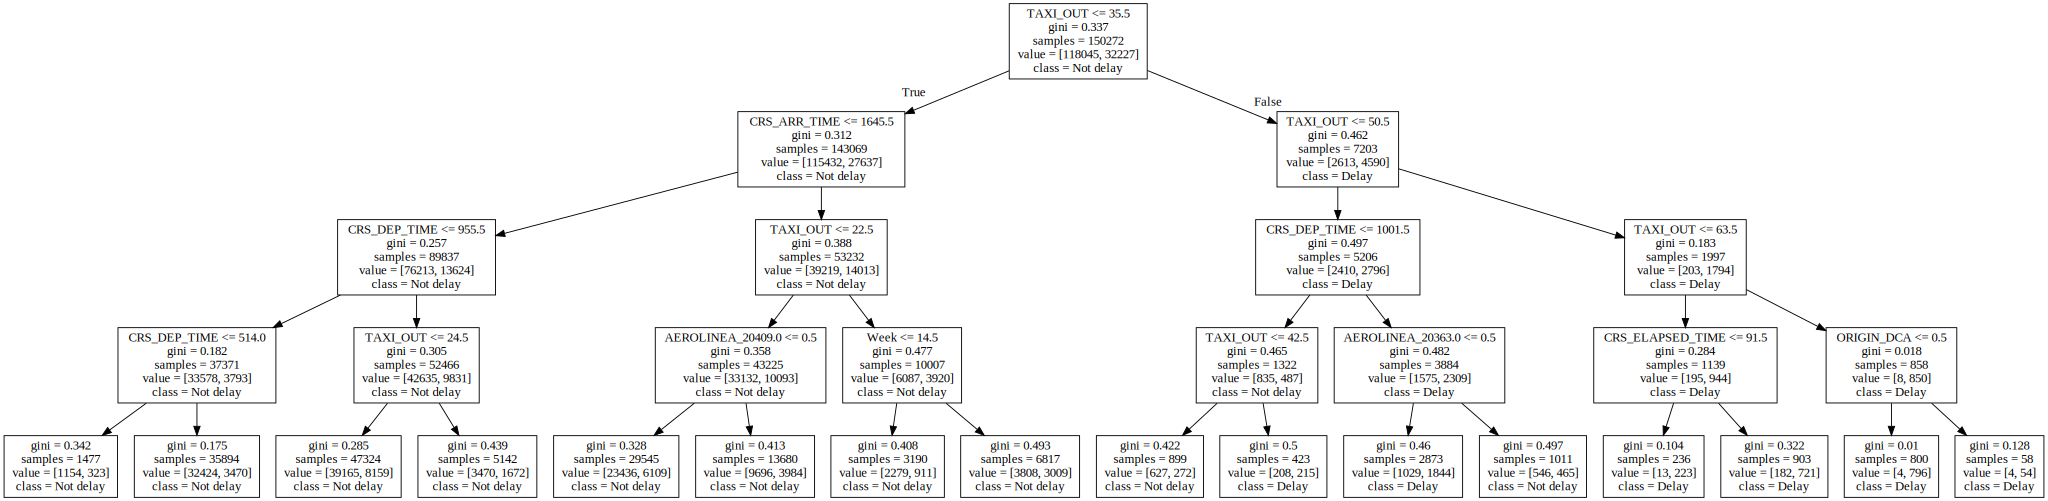

In [107]:
graphviz.Source(dot_data)

#### Prediccion del modelo

In [108]:
dt.predict(X_test)

array([1., 0., 0., ..., 0., 0., 0.])

In [109]:
dt.predict_proba(X_test)

array([[0.20155039, 0.79844961],
       [0.90332646, 0.09667354],
       [0.79323067, 0.20676933],
       ...,
       [0.79323067, 0.20676933],
       [0.79323067, 0.20676933],
       [0.78131347, 0.21868653]])

In [111]:
y_test_pred = pd.DataFrame(dt.predict(X_test), index= y_test.index, columns = ['DelayPrediction'])

In [112]:
y_test_pred.head()

,DelayPrediction
91964,1.0
205250,0.0
156190,0.0
117192,0.0
33706,0.0


In [114]:
results_df = y_test.join(y_test_pred)

In [117]:
results_df['Success'] = (results_df['DelayPrediction'] == results_df[TARGET]).astype(int)

In [118]:
results_df.head()

,ARR_DEL15,DelayPrediction,Success
91964,1.0,1.0,1
205250,1.0,0.0,0
156190,0.0,0.0,1
117192,0.0,0.0,1
33706,0.0,0.0,1


In [ ]:
#evaluar el modelo

In [119]:
#accuracy
results_df['Success'].mean()

0.8002608533631451